In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv("crx.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
data.shape

(690, 16)

In [5]:
100*data[15].isin(['+']).sum()/data[15].count()

44.492753623188406

In [6]:
100*data[15].isin(['-']).sum()/data[15].count()

55.507246376811594

In [7]:
data.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [8]:
data.isin(['?']).sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [9]:
100*data.isin(['?']).sum()/data.count()

0     1.739130
1     1.739130
2     0.000000
3     0.869565
4     0.869565
5     1.304348
6     1.304348
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    1.884058
14    0.000000
15    0.000000
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [11]:
data[1].mask(data[1]=="?",other=0.0, inplace=True)
data[1]=pd.to_numeric(data[1])
data[1].mask(data[1]==0.0,other=data[1].mean(), inplace=True)

In [12]:
data[data[13].isin(["?"])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
71,b,34.830000,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
202,b,24.830000,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.580000,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.750000,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,37.580000,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
278,b,24.580000,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
330,b,20.420000,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
406,a,40.330000,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
445,a,31.019159,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
456,b,34.580000,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-


In [13]:
x=list(data[data[13].isin(["?"])].index)

In [14]:
data=data.drop(labels=x, axis=0)

In [15]:
data[data[13].isin(["?"])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [17]:
data.shape

(677, 16)

In [18]:
data[13]=pd.to_numeric(data[13])

In [19]:
x=list(data.describe().columns)

In [20]:
itr=list(set(range(16))-set(x))

In [21]:
itr

[0, 3, 4, 5, 6, 8, 9, 11, 12, 15]

In [22]:
for i in itr:
    data[i].mask(data[i]=='?', other=np.nan, inplace=True)

In [23]:
for i in itr:
    for j,k in enumerate(data[i].unique()):
        data[i].mask(data[i]==k, other=j, inplace=True)
    data[i].fillna(int(data[i].mode()),inplace=True)

In [24]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 689
Data columns (total 16 columns):
0     677 non-null int64
1     677 non-null float64
2     677 non-null float64
3     677 non-null int64
4     677 non-null int64
5     677 non-null int64
6     677 non-null int64
7     677 non-null float64
8     677 non-null int64
9     677 non-null int64
10    677 non-null int64
11    677 non-null int64
12    677 non-null int64
13    677 non-null int64
14    677 non-null int64
15    677 non-null int64
dtypes: float64(3), int64(13)
memory usage: 89.9 KB


In [26]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,0,0,1.25,0,0,1,0,0,202,0,0
1,1,58.67,4.460,0,0,1,1,3.04,0,0,6,0,0,43,560,0
2,1,24.50,0.500,0,0,1,1,1.50,0,1,0,0,0,280,824,0
3,0,27.83,1.540,0,0,0,0,3.75,0,0,5,1,0,100,3,0
4,0,20.17,5.625,0,0,0,0,1.71,0,1,0,0,1,120,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA6071F470>,
      dtype=object)

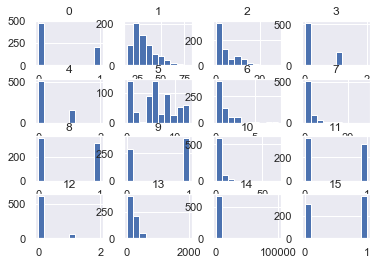

In [27]:
data.hist()

C:\Users\E 460\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\E 460\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


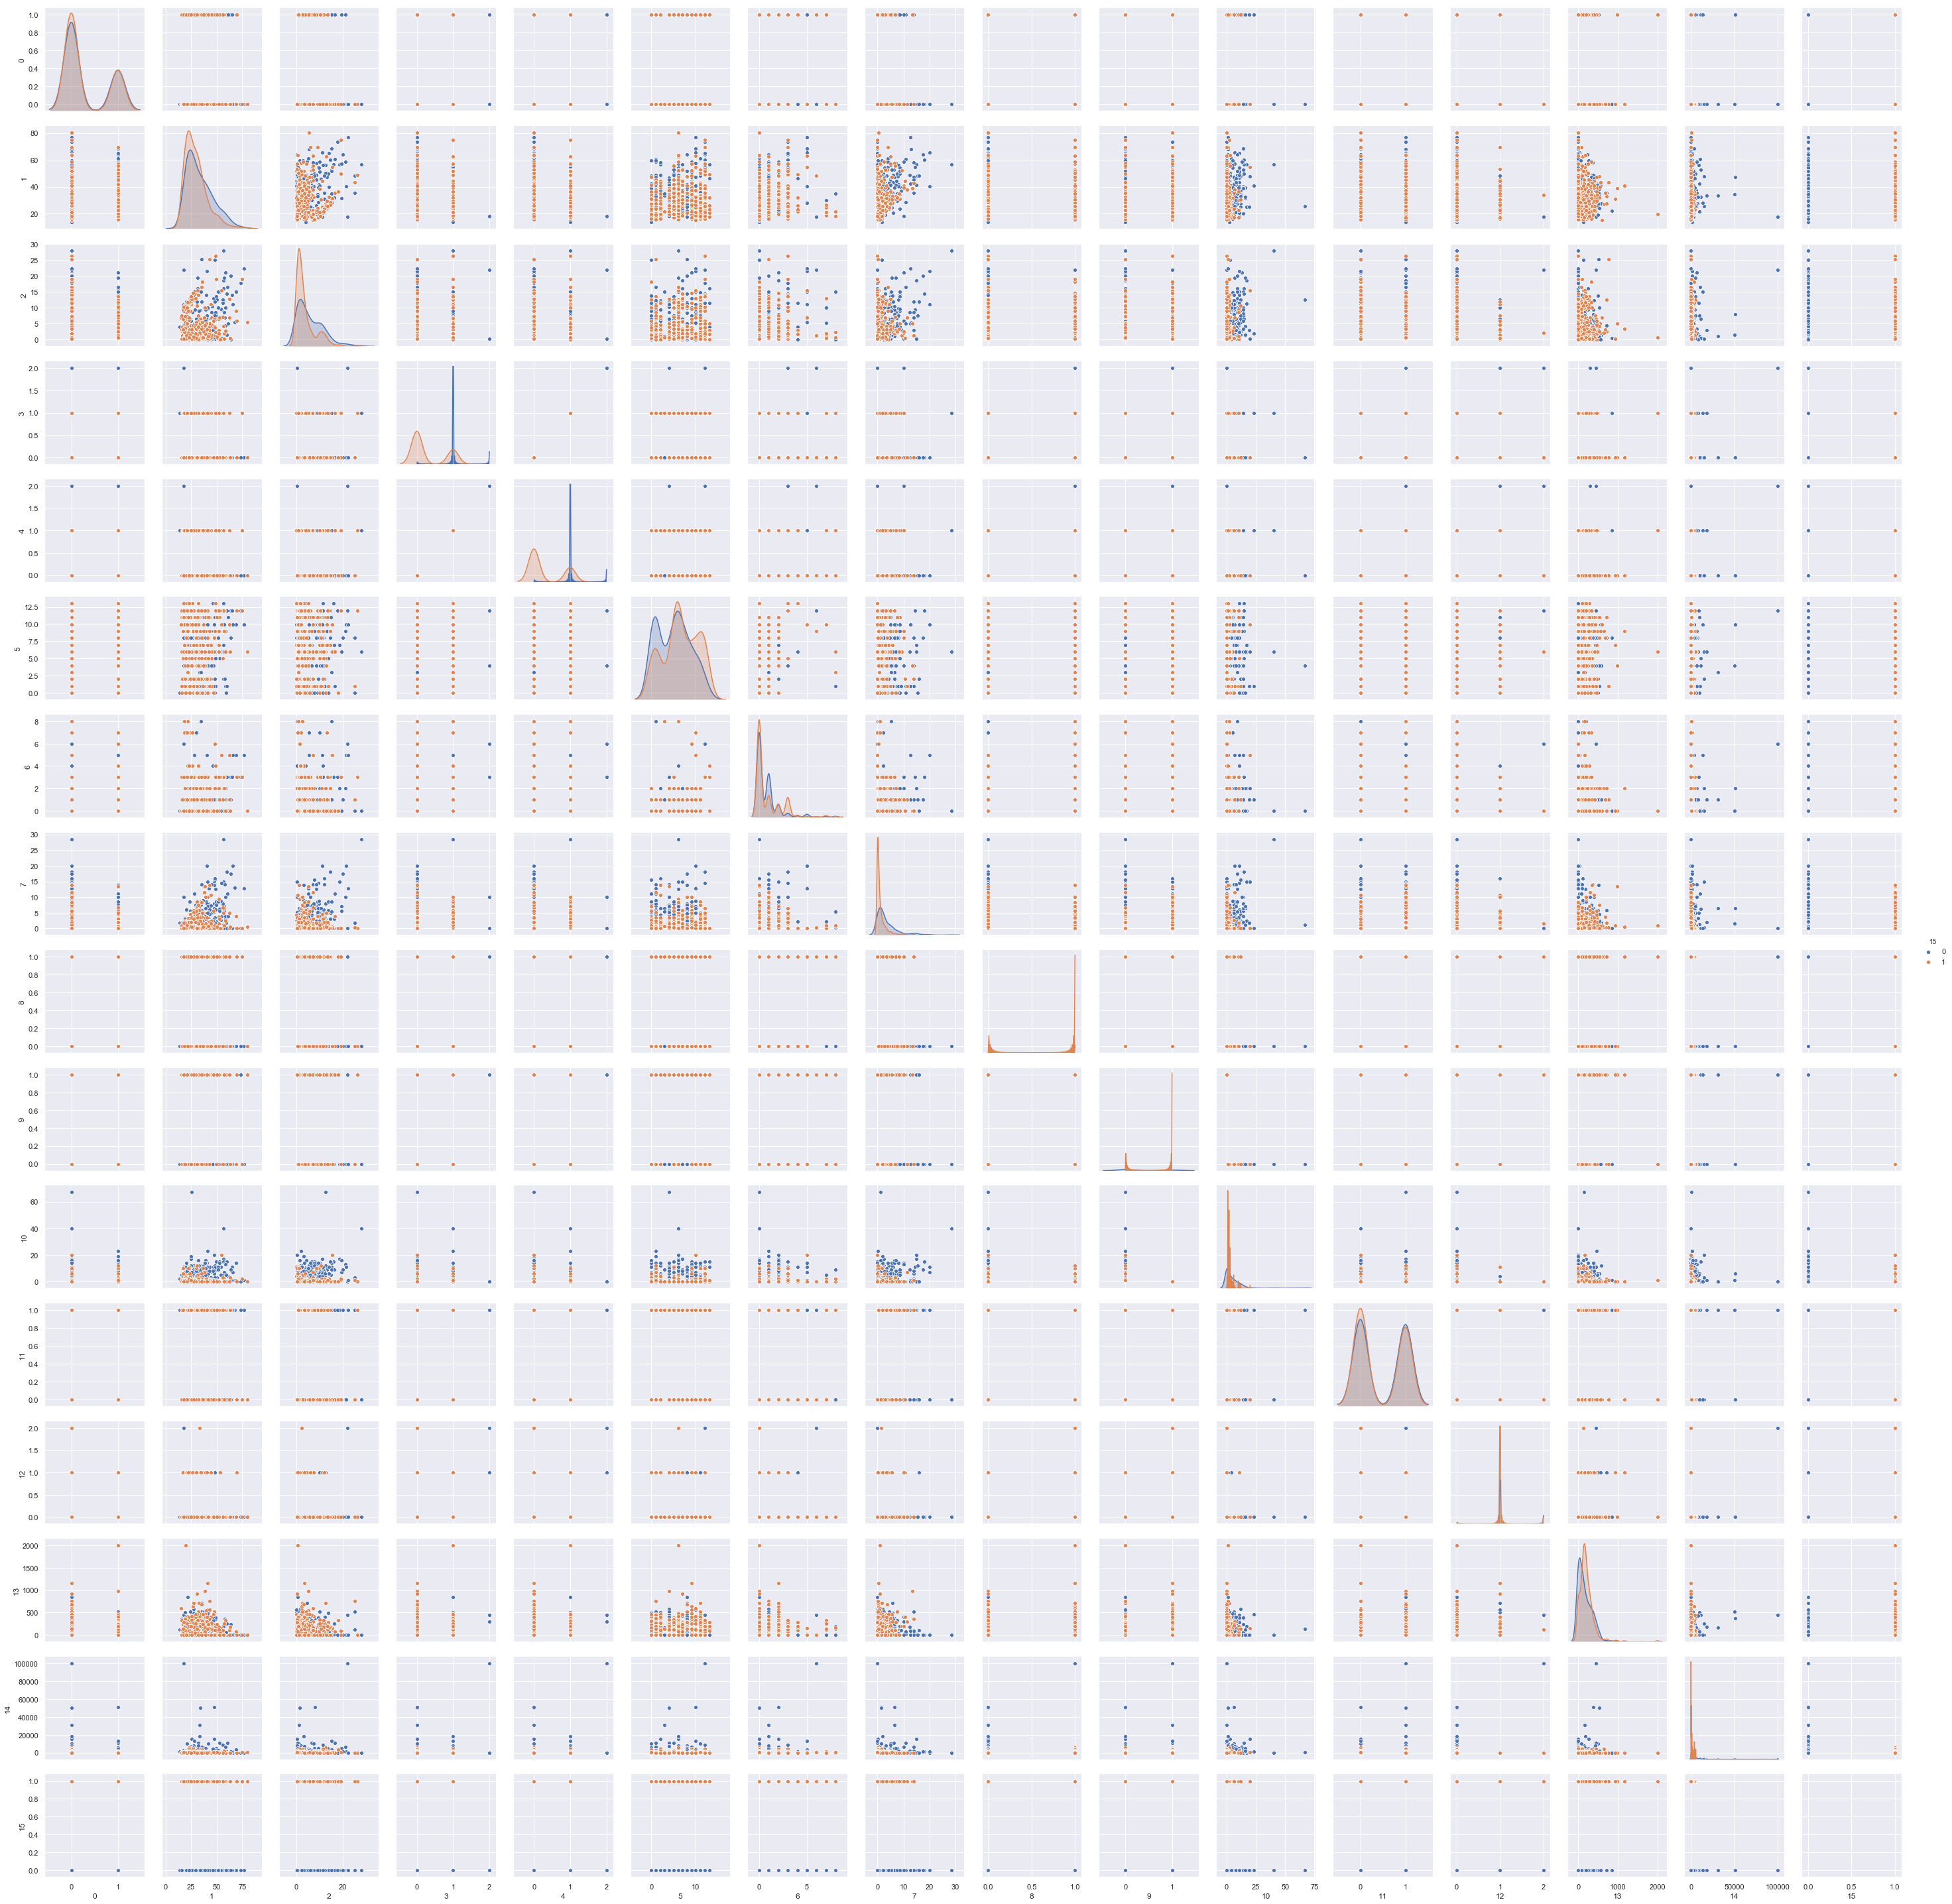

In [28]:
sns.pairplot(data, hue=15)

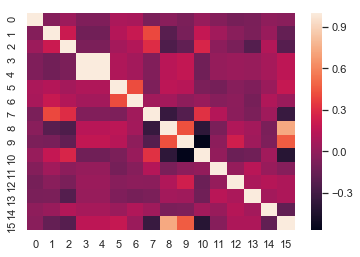

In [29]:
sns.heatmap(data.corr())

In [30]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,0.302806,31.560119,4.768922,0.242245,0.242245,5.945347,0.849335,2.239823,0.471196,0.568685,2.426883,0.463811,0.090103,184.014771,988.850812,0.555391
std,0.459812,11.822998,4.983325,0.435604,0.435604,3.818163,1.398770,3.344643,0.499539,0.495626,4.897716,0.499057,0.296687,173.806768,5162.099377,0.497290
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,0.000000,2.000000,0.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000
50%,0.000000,28.670000,2.750000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,37.750000,7.040000,0.000000,0.000000,9.000000,1.000000,2.750000,1.000000,1.000000,3.000000,1.000000,0.000000,276.000000,396.000000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,2000.000000,100000.000000,1.000000


In [31]:
for i in range(16):
    p25=np.percentile(data[i], 25, interpolation = 'midpoint')
    p50=np.percentile(data[i], 50, interpolation = 'midpoint')
    p75=np.percentile(data[i], 75, interpolation = 'midpoint')
    Iqr=p75-p25
    l=p25-Iqr
    u=p75+Iqr
    x=list(data[data[i]<l].index)
    y=list(data[data[i]>u].index)
    x=x+y
    data=data.drop(labels=x, axis=0)

In [32]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.000000,270.000000,270.000000
mean,0.311111,27.230142,3.454704,0.266667,0.266667,5.492593,0.311111,1.009056,0.637037,0.733333,0.455556,0.470370,0.0,171.314815,55.029630,0.725926
std,0.463808,8.140519,3.430231,0.443038,0.443038,3.475611,0.590717,1.084365,0.481747,0.443038,0.881378,0.500048,0.0,113.950786,108.242392,0.446875
min,0.000000,15.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,20.872500,0.835000,0.000000,0.000000,2.000000,0.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,0.000000,0.000000
50%,0.000000,25.170000,2.000000,0.000000,0.000000,6.000000,0.000000,0.540000,1.000000,1.000000,0.000000,0.000000,0.0,160.000000,0.000000,1.000000
75%,1.000000,32.310000,5.000000,1.000000,1.000000,8.000000,0.000000,1.500000,1.000000,1.000000,1.000000,1.000000,0.0,240.000000,40.750000,1.000000
max,1.000000,52.500000,12.000000,1.000000,1.000000,13.000000,2.000000,4.750000,1.000000,1.000000,4.000000,1.000000,0.0,443.000000,484.000000,1.000000


In [33]:
for i in range(16):
    data[i]=data[i]/data[i].max()

In [34]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,0.0,270.000000,270.000000,270.000000
mean,0.311111,0.518669,0.287892,0.266667,0.266667,0.422507,0.155556,0.212433,0.637037,0.733333,0.113889,0.470370,NaN,0.386715,0.113698,0.725926
std,0.463808,0.155058,0.285853,0.443038,0.443038,0.267355,0.295359,0.228287,0.481747,0.443038,0.220345,0.500048,NaN,0.257225,0.223641,0.446875
min,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,0.397571,0.069583,0.000000,0.000000,0.153846,0.000000,0.034737,0.000000,0.000000,0.000000,0.000000,NaN,0.225734,0.000000,0.000000
50%,0.000000,0.479429,0.166667,0.000000,0.000000,0.461538,0.000000,0.113684,1.000000,1.000000,0.000000,0.000000,NaN,0.361174,0.000000,1.000000
75%,1.000000,0.615429,0.416667,1.000000,1.000000,0.615385,0.000000,0.315789,1.000000,1.000000,0.250000,1.000000,NaN,0.541761,0.084194,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000


In [35]:
data=data.drop(12, axis=1)

In [36]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.311111,0.518669,0.287892,0.266667,0.266667,0.422507,0.155556,0.212433,0.637037,0.733333,0.113889,0.470370,0.386715,0.113698,0.725926
std,0.463808,0.155058,0.285853,0.443038,0.443038,0.267355,0.295359,0.228287,0.481747,0.443038,0.220345,0.500048,0.257225,0.223641,0.446875
min,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.397571,0.069583,0.000000,0.000000,0.153846,0.000000,0.034737,0.000000,0.000000,0.000000,0.000000,0.225734,0.000000,0.000000
50%,0.000000,0.479429,0.166667,0.000000,0.000000,0.461538,0.000000,0.113684,1.000000,1.000000,0.000000,0.000000,0.361174,0.000000,1.000000
75%,1.000000,0.615429,0.416667,1.000000,1.000000,0.615385,0.000000,0.315789,1.000000,1.000000,0.250000,1.000000,0.541761,0.084194,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
x_data=data.drop(15, axis=1)
y_data=data[15]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\E 460\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
logreg.score(x_train,y_train)

0.8712871287128713

In [41]:
logreg.score(x_test,y_test)

0.8235294117647058

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
knn.score(x_train,y_train)

0.8811881188118812

In [44]:
knn.score(x_test, y_test)

0.8235294117647058

In [45]:
from sklearn.neighbors import KNeighborsClassifier
train_score=list(range(10))
test_score=list(range(10))
for i in range (10):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(x_train, y_train)
    train_score[i]=knn.score(x_train,y_train)
    test_score[i]=knn.score(x_test,y_test)

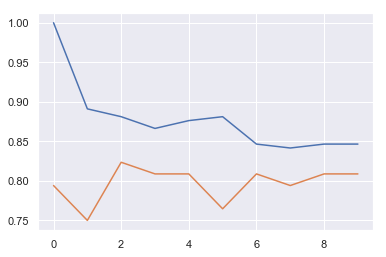

In [46]:
plt.plot(range(10),train_score, test_score)

In [56]:
data=pd.read_csv("crx.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [57]:
for i in range(16):
    print(data[data[i].isin(["?"])].index)

Int64Index([248, 327, 346, 374, 453, 479, 489, 520, 598, 601, 641, 673], dtype='int64')
Int64Index([83, 86, 92, 97, 254, 286, 329, 445, 450, 500, 515, 608], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([206, 270, 330, 456, 592, 622], dtype='int64')
Int64Index([206, 270, 330, 456, 592, 622], dtype='int64')
Int64Index([206, 270, 330, 456, 479, 539, 592, 601, 622], dtype='int64')
Int64Index([206, 270, 330, 456, 479, 539, 592, 601, 622], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([71, 202, 206, 243, 270, 278, 330, 406, 445, 456, 592, 622, 626], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [68]:
for i in range(16):
    data=data.drop(labels=data[data[i].isin(["?"])].index, axis=0)

In [69]:
for i in range(16):
    print(data[data[i].isin(["?"])].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [70]:
data.describe()

,2,7,10,14
count,653.000000,653.000000,653.000000,653.000000
mean,4.829533,2.244296,2.502297,1013.761103
std,5.027077,3.371120,4.968497,5253.278504
min,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000
50%,2.835000,1.000000,0.000000,5.000000
75%,7.500000,2.625000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


In [72]:
data.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [76]:
for i in itr:
    for j,k in enumerate(data[i].unique()):
        data[i].mask(data[i]==k, other=j, inplace=True)

In [77]:
for i in range(16):
    data[i]=pd.to_numeric(data[i])

In [78]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.310873,31.503813,4.829533,0.238897,0.238897,5.918836,0.862175,2.244296,0.465544,0.560490,2.502297,0.462481,0.087289,180.359877,1013.761103,0.546708
std,0.463206,11.838267,5.027077,0.433866,0.433866,3.841311,1.411823,3.371120,0.499194,0.496708,4.968497,0.498973,0.293133,168.296811,5253.278504,0.498195
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,0.000000,0.000000,2.000000,0.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,28.420000,2.835000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,38.250000,7.500000,0.000000,0.000000,9.000000,1.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,272.000000,400.000000,1.000000
max,1.000000,76.750000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,2000.000000,100000.000000,1.000000


In [79]:
x_data=data.drop(15, axis=1)
y_data=data[15]

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\E 460\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
logreg.score(x_train,y_train)

0.8773006134969326

In [83]:
logreg.score(x_test,y_test)

0.8658536585365854

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
knn.score(x_train,y_train)

0.8118609406952966

In [86]:
knn.score(x_test,y_test)

0.6341463414634146

In [87]:
from sklearn.neighbors import KNeighborsClassifier
train_score=list(range(10))
test_score=list(range(10))
for i in range (10):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(x_train, y_train)
    train_score[i]=knn.score(x_train,y_train)
    test_score[i]=knn.score(x_test,y_test)

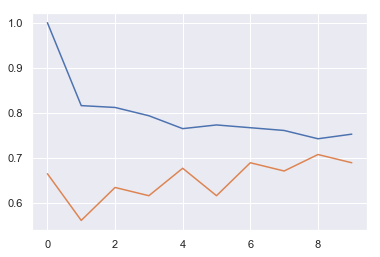

In [88]:
plt.plot(range(10),train_score, test_score)